# T<sub>2</sub> Ramey Characterization

This experiment serves as one of the series of experiments used to characterize a single qubit. Its purpose is to determine two of the qubit's properties: *Ramsey* or *detuning frequency* and $T_2\ast$. The rough frequency of the qubit was already determined previously. Here, we would like to measure the *detuning*, that is  the difference between the qubit's precise frequency and the frequency of the rotation pulses (based on the rough frequency). This part of the experiment is called a *Ramsey Experiment*. $T_2\ast$ represents the rate of decay toward a mixed state, when the qubit is initialized to the |+⟩ state.

In [1]:
import qiskit
from qiskit_experiments.library import T2Ramsey

The circuit used for the experiment comprises the following:

    1. Hadamard gate
    2. delay
    3. p (phase) gate that rotates the qubit in the x-y plane 
    4. Hadamard gate
    5. measurement

During the delay time, we expect the qubit to precess about the z-axis. If the p gate and the precession offset each other perfectly, then the qubit will arrive at the |0⟩ state (after the second Hadamard gate). By varying the extension of the delays, we get a series of oscillations of the qubit state between the |0⟩ and |1⟩ states. We can draw the graph of the resulting function, and can analytically extract the desired values.

In [2]:
# set the computation units to microseconds
unit = "us"  # microseconds
qubit = 0
# set the desired delays
delays = list(range(1, 150, 2))

In [3]:
# Create a T2Ramsey experiment. Print the first circuit as an example
exp1 = T2Ramsey(qubit, delays, unit=unit, osc_freq=0.1111)
print(exp1.circuits()[0])

     ┌───┐┌──────────────┐┌──────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├┤ DELAY(1[us]) ├┤ P(0) ├─░─┤ H ├─░─┤M├
     └───┘└──────────────┘└──────┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════╩═
                                              0 


We run the experiment on a simple, simulated backend, created specifically for this experiment's tutorial.

In [4]:
from qiskit_experiments.test.t2ramsey_backend import T2RamseyBackend
# FakeJob is a wrapper for the backend, to give it the form of a job
from qiskit_experiments.test.utils import FakeJob
import qiskit_experiments.matplotlib
from qiskit_experiments.matplotlib import pyplot, requires_matplotlib
from qiskit_experiments.matplotlib import HAS_MATPLOTLIB

conversion_factor = 1e-6
# The behavior of the backend is determined by the following parameters
backend = T2RamseyBackend(
    p0={
        "a_guess": [0.5],
        "t2ramsey": [80.0],
        "f_guess": [0.02],
        "phi_guess": [0.0],
        "b_guess": [0.5],
    },
    initial_prob_plus=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
    conversion_factor=conversion_factor,
)

The resulting graph will have the form:
$f(t) = a^{-t/T_2*} \cdot \cos(2 \pi f t + \phi) + b$
where *t* is the delay, $T_2*$ is the decay factor, and *f* is the detuning frequency.
`conversion_factor` is a scaling factor that depends on the measurement units used. It is 1E-6 here, because the unit is microseconds.

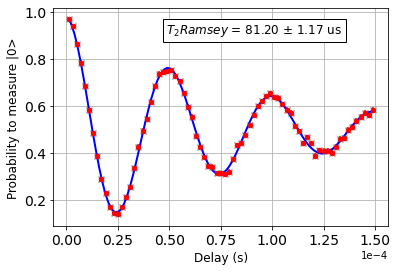

In [5]:
exp1.set_analysis_options(user_p0=None, plot=True)
expdata1 = exp1.run(backend=backend, shots=2000)
expdata1.block_for_results()  # Wait for job/analysis to finish.
# Display the figure
display(expdata1.figure(0))

In [6]:
# T2* results:
t2ramsey = expdata1.analysis_results(0).data()
t2ramsey

{'value': 8.119888734234995e-05,
 'stderr': 1.1732134060237844e-06,
 'unit': 's',
 'result_type': 'T2Ramsey',
 'fit': {'popt': array([ 4.80800910e-01,  8.11988873e-05,  1.99862855e+04, -3.54455132e-04,
          5.00308274e-01]),
  'popt_keys': None,
  'popt_err': array([3.08570554e-03, 1.17321341e-06, 3.67867154e+01, 1.10646030e-02,
         1.23281264e-03]),
  'pcov': array([[ 9.52157867e-06, -2.23211135e-09, -2.20537484e-02,
           9.47235941e-06, -6.05452911e-07],
         [-2.23211135e-09,  1.37642970e-12,  3.50045585e-06,
          -1.78851855e-09,  2.03470999e-10],
         [-2.20537484e-02,  3.50045585e-06,  1.35326243e+03,
          -3.13821712e-01, -1.16770978e-02],
         [ 9.47235941e-06, -1.78851855e-09, -3.13821712e-01,
           1.22425439e-04,  3.93775831e-06],
         [-6.05452911e-07,  2.03470999e-10, -1.16770978e-02,
           3.93775831e-06,  1.51982702e-06]]),
  'reduced_chisq': 1.0009782741856137,
  'dof': 70,
  'xrange': [1e-06, 0.000149],
  'circuit_uni

In [7]:
# Frequency result:
frequency = expdata1.analysis_results(1).data()
frequency

{'value': 19986.285521503196,
 'stderr': 36.78671541710355,
 'unit': 'Hz',
 'result_type': 'RamseyFrequency',
 'fit': {'popt': array([ 4.80800910e-01,  8.11988873e-05,  1.99862855e+04, -3.54455132e-04,
          5.00308274e-01]),
  'popt_keys': None,
  'popt_err': array([3.08570554e-03, 1.17321341e-06, 3.67867154e+01, 1.10646030e-02,
         1.23281264e-03]),
  'pcov': array([[ 9.52157867e-06, -2.23211135e-09, -2.20537484e-02,
           9.47235941e-06, -6.05452911e-07],
         [-2.23211135e-09,  1.37642970e-12,  3.50045585e-06,
          -1.78851855e-09,  2.03470999e-10],
         [-2.20537484e-02,  3.50045585e-06,  1.35326243e+03,
          -3.13821712e-01, -1.16770978e-02],
         [ 9.47235941e-06, -1.78851855e-09, -3.13821712e-01,
           1.22425439e-04,  3.93775831e-06],
         [-6.05452911e-07,  2.03470999e-10, -1.16770978e-02,
           3.93775831e-06,  1.51982702e-06]]),
  'reduced_chisq': 1.0009782741856137,
  'dof': 70,
  'xrange': [1e-06, 0.000149],
  'circuit_uni

### Providing initial user estimates
The user can provide initial estimates for the parameters to help the analysis process. Because the curve is expected to decay toward $0.5$, the natural choice for parameters $A$ and $B$ is $0.5$. Varying the value of $\phi$ will shift the graph along the x-axis. Since this is not of interest to us, we can safely initialize $\phi$ to 0. In this experiment, `t2ramsey` and `f` are the parameters of interest. Good estimates for them are values computed in previous experiments on this qubit or a similar values computed for other qubits.

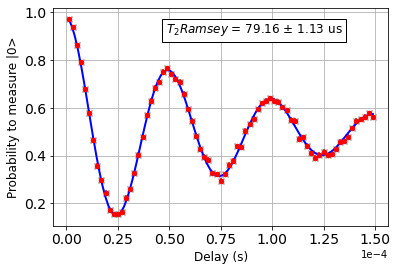

T2Ramsey: 7.915718737694317e-05
Fitted frequency: 19987.370510637236


In [8]:
from qiskit_experiments.library.characterization import T2RamseyAnalysis
user_p0={
    "A": 0.5,
    "t2ramsey": 85.0,
    "f": 0.021,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2Ramsey(qubit, delays, unit=unit)
exp_with_p0.set_analysis_options(user_p0=user_p0, plot=True)
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000)
expdata_with_p0.block_for_results()
display(expdata_with_p0.figure(0))
t2ramsey = expdata_with_p0.analysis_results(0).data()["value"]
frequency = expdata_with_p0.analysis_results(1).data()["value"]
print("T2Ramsey:", t2ramsey)
print("Fitted frequency:", frequency)

The units can be changed, but the output in the result is always given in seconds. The units in the backend must be adjusted accordingly.

In [9]:
from qiskit.utils import apply_prefix

unit = "ns"
delays = list(range(1000, 150000, 2000))
conversion_factor = apply_prefix(1, unit)
print(conversion_factor)

1e-09


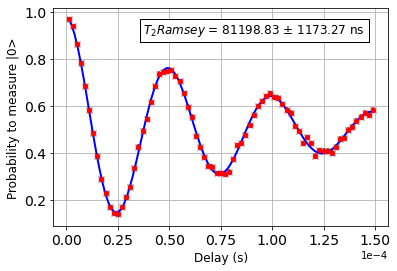

T2Ramsey: 8.11988278439035e-05
Fitted frequency: 99019986.28277074


In [10]:
p0 = {
    "a_guess": [0.5],
    "t2ramsey": [80000],
    "f_guess": [0.00002],
    "phi_guess": [0.0],
    "b_guess": [0.5],
}
backend_in_ns = T2RamseyBackend(
    p0=p0,
    initial_prob_plus=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
    conversion_factor=conversion_factor,
)
exp_in_ns = T2Ramsey(qubit, delays, unit=unit)
exp_in_ns.set_analysis_options(user_p0=None, plot=True)
expdata_in_ns = exp_in_ns.run(backend=backend_in_ns, shots=2000)
expdata_in_ns.block_for_results()
display(expdata_in_ns.figure(0))
t2ramsey = expdata_in_ns.analysis_results(0).data()["value"]
frequency = expdata_in_ns.analysis_results(1).data()["value"]
print("T2Ramsey:", t2ramsey)
print("Fitted frequency:", frequency)

### Adding data to an existing experiment
It is possible to add data to an experiment, after the analysis of the first set of data. In the next example we add exp2 to `exp_in_ns` that we showed above.

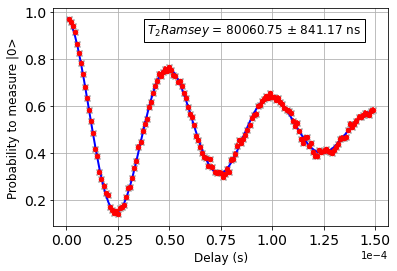

In [11]:
more_delays = list(range(2000, 150000, 2000))
exp_new = T2Ramsey(qubit, more_delays, unit=unit)
exp_new.set_analysis_options(user_p0=None, plot=True)
expdata_new = exp_new.run(
            backend=backend_in_ns,
            experiment_data=expdata_in_ns,
            shots=2000
        )
expdata_new.block_for_results()
display(expdata_new.figure(1))

In [12]:
# The results of the second execution are indices 2 and 3 of the analysis result
t2ramsey = expdata_new.analysis_results(2).data()["value"]
frequency = expdata_new.analysis_results(3).data()["value"]
print("T2Ramsey:", t2ramsey)
print("Fitted frequency:", frequency)

T2Ramsey: 8.006074592283946e-05
Fitted frequency: 98980008.19039865
